<a href="https://colab.research.google.com/github/hin1799/Advanced-Machine-Learning/blob/main/Advanced_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake News Detection

Fake news is false or misleading information that is spread through different media channels (social media, news websites, traditional media outlets).

Fake news can have serious consequences:
- Spreading false information about public health and safety (eg. Covid time)
- Influencing political opinions and elections
- Inciting violence and hate crimes


**Submitted By:**

- Jigar Shekhat(202211004)
- Jainisha Choksi (202211019)
- Hinal Desai (202211035)
- Man Desai (202211040)
- Rutvik Prajapati (202211053)

# Required libraries

In [3]:
import numpy as np
import pandas as pd
import json
import csv
import random
  
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
  
import pprint
import tensorflow.compat.v1 as tf
from tensorflow.python.framework import ops
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
tf.disable_eager_execution()

In [2]:
#Mounting the Drive:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
news = pd.read_csv("/content/drive/MyDrive/Advanced ML/Datasets/FakeNewsDataset.csv")

In [5]:
news.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [ ]:
news.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

Our dataset has three required columns:

- title: short title that describes what the news is about
- text: content of news article
- label: news is fake or not (0 or 1)

**Size of dataset**

In [6]:
news.shape

(72134, 4)

In [8]:
news.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

Our dataset has 558 missing values for title column and 39 missing values for text column.

# Preprocessing

The first column in our dataset: **Unamed:0** is not required. So we will drop it.

In [9]:
news1 = news.drop(['Unnamed: 0'], axis=1)
news1.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [10]:
news1.shape

(72134, 3)

In [11]:
news1.dropna(inplace=True)

In [12]:
news1.shape

(71537, 3)

The size of our dataset is 71537 rows after dropping the null valued rows.

**Checking if the dataset labels have class imbalance**

<Axes: xlabel='label', ylabel='count'>

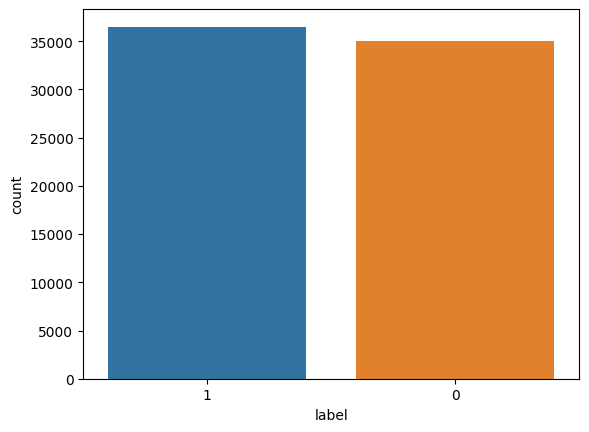

In [13]:
import seaborn as sns
sns.countplot(data=news1, x='label', order=news1['label'].value_counts().index)

From the above bar graph, we can see that there is no class imbalance. So, we can go ahead.

## NLP Tasks

In [14]:
import nltk
import pandas as pd
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Performing the NLP steps of

1. Tokenization
2. Stopword removal
3. Lemmatization

In [15]:
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Stopword removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    return ' '.join(lemmatized_tokens)

In [16]:
news1['text'] = news1['text'].apply(str)

Taking a sample of dataframe consisting of 5000 rows, due to RAM issues.

In [17]:
news1 = news1.sample(n=5000)

In [18]:
news1 = news1.reset_index().drop('index', axis=1)

In [19]:
news1.shape

(5000, 3)

Checking if the class is balanced after choosing the sample.

<Axes: xlabel='label', ylabel='count'>

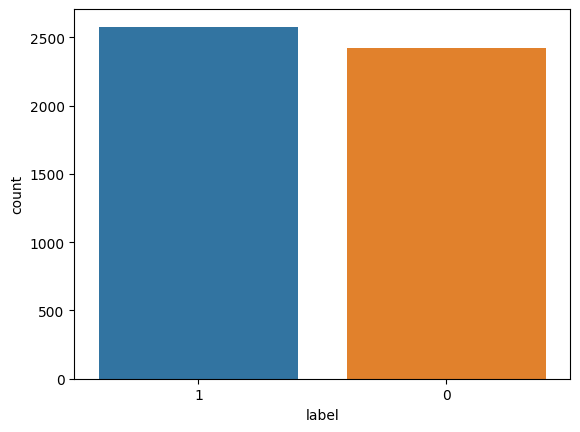

In [20]:
#checking if class if balanced after choosing chunk of data.

sns.countplot(data=news1, x='label', order=news1['label'].value_counts().index)

The class is still balanced after sampling.

**Applying preprocessing on news text**

In [21]:
news1['preprocessed_text'] = news1['text'].apply(lambda x: preprocess_text(x))

In [22]:
news1

,title,text,label,preprocessed_text
0,U.S. carrier patrols off Korean peninsula in w...,"ABOARD USS RONALD REAGAN, Sea of Japan (Reuter...",0,"ABOARD USS RONALD REAGAN , Sea Japan ( Reuters..."
1,"Only In Banana Republics, Despotic Monarchies ...","in: Civil Rights , Government , Government Con...",1,": Civil Rights , Government , Government Contr..."
2,Highlights: The Trump presidency on April 26 a...,(Reuters) - Highlights for U.S. President Dona...,0,( Reuters ) - Highlights U.S. President Donald...
3,BOOM! WATCH DR BEN CARSON’S MIC DROP MOMENT WI...,Dr. Ben Carson is one of the best at putting a...,1,Dr. Ben Carson one best putting difficult topi...
4,Road to 270: 's new election map,Washington One week after we moved Nevada and ...,0,Washington One week moved Nevada Florida `` ba...
...,...,...,...,...
4995,RACE OBSESSED MTV Host Mocks Trump Supporters:...,Here's Pence getting booed as he gets to his s...,1,'s Pence getting booed get seat Hamilton pic.t...
4996,Russia unveils monument to designer of iconic ...,MOSCOW (Reuters) - Russia on Tuesday unveiled ...,0,MOSCOW ( Reuters ) - Russia Tuesday unveiled s...
4997,OOPS! VIDEO Shows Senator McCain Saying He’ll ...,In spite of Senator John McCain s promise to h...,1,spite Senator John McCain promise constituent ...
4998,"Maher: When GOP Goes Low, Democrats Should ’Ki...",WARNING: ADULT CONTENT] Friday night during h...,0,WARNING : ADULT CONTENT ] Friday night “ New R...


In [23]:
#Variables Defining:
embedding_dim = 50
max_length =54
trunc_type ='post'
padding_type ='post'
oov_tok ="<OOV>"
training_size = news1.shape[0]
test_portion = 0.1

In [24]:
# #Tokenization:
title =[]
text=[]
labels = []
for x in range(training_size):
  title.append(news1['title'][x])
  text.append(news1['preprocessed_text'][x])
  labels.append(news1['label'][x])

In [25]:
# #Applying Tokenization:
tokenizer1 = Tokenizer()
tokenizer1.fit_on_texts(str(title))
word_index1 = tokenizer1.word_index
vocab_size1 = len(word_index1)
sequences1 = tokenizer1.texts_to_sequences(str(title))
padded1 = pad_sequences(sequences1, padding = padding_type, truncating = trunc_type)
split = int(test_portion * training_size)
training_sequences1 = padded1[split:training_size]
test_sequences1 = padded1[0:split]
test_labels = labels[0:split]
training_labels = labels[split:training_size]

# Exploratory Data Analysis

**World cloud for all words in preprocessed text**

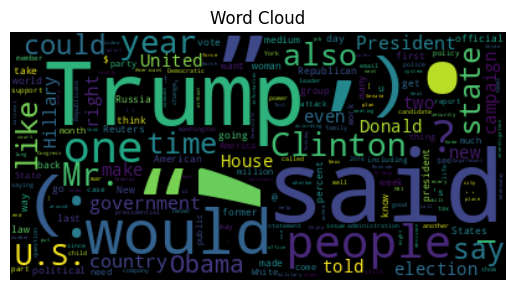

In [115]:
#Word frequency:
from collections import Counter
from wordcloud import WordCloud

#Combine all the text:
all_text = ' '.join(news1['preprocessed_text'].values.tolist())

#Count the frequency of each word:
word_counts = Counter(all_text.split())

#Generate Word Cloud:
wordcloud = WordCloud(background_color='black').generate_from_frequencies(word_counts)

#Plot the Word CLoud:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

**Plotting the world cloud for real news words in preprocessed text**

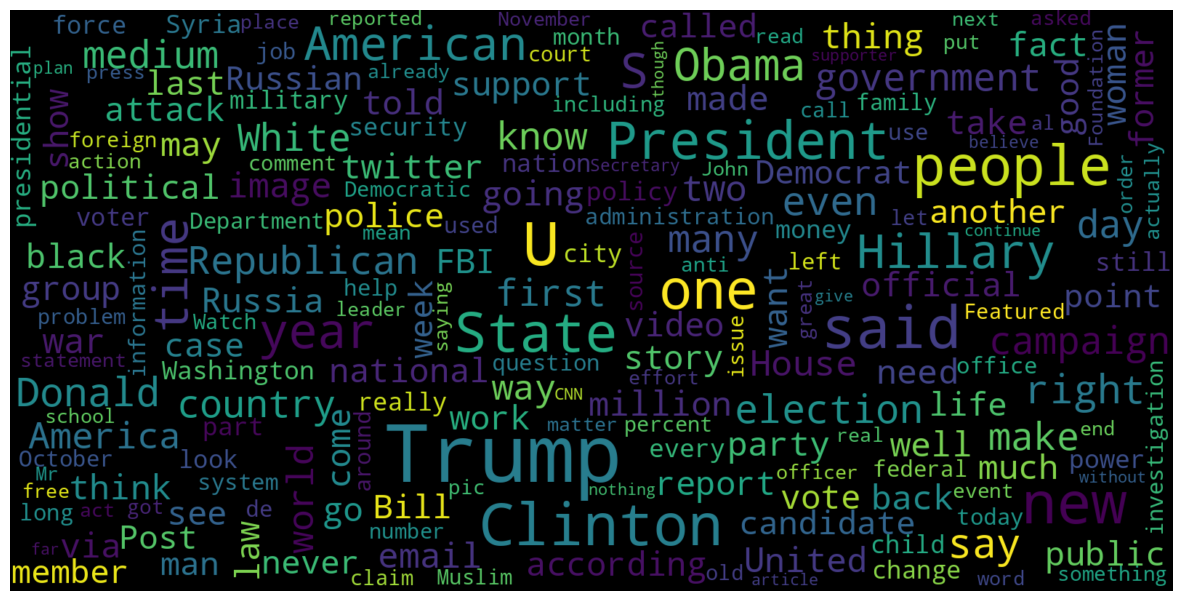

In [26]:
#Real News Words:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
consolidated = ' '.join(
    word for word in news1['preprocessed_text'][news1['label'] == 1].astype(str))
wordCloud = WordCloud(width=1600,height=800,random_state=21,max_font_size=110,collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

**Plotting the world cloud for fake news words in preprocessed text**

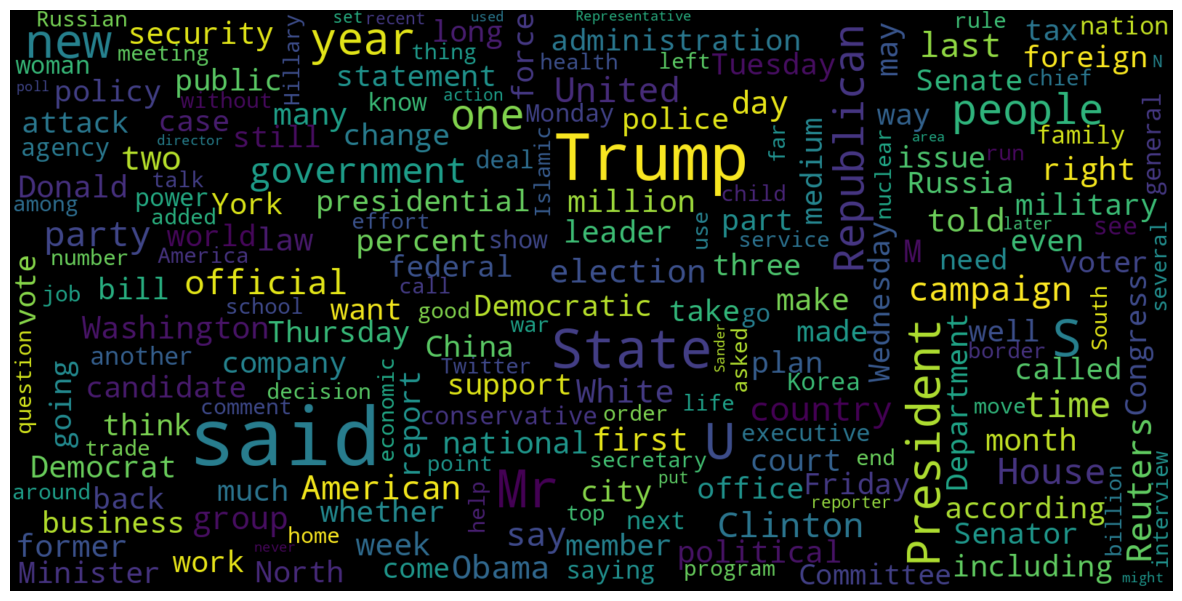

In [27]:
#Fake News Words:
consolidated = ' '.join(
    word for word in news1['preprocessed_text'][news1['label'] == 0].astype(str))
wordCloud = WordCloud(width=1600,height=800,random_state=21,max_font_size=110,collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

**Bar graph for top 20 most frequent words**

<Axes: title={'center': 'Bar Graph of Top20 most frequent words'}, xlabel='Top Words', ylabel='Count'>

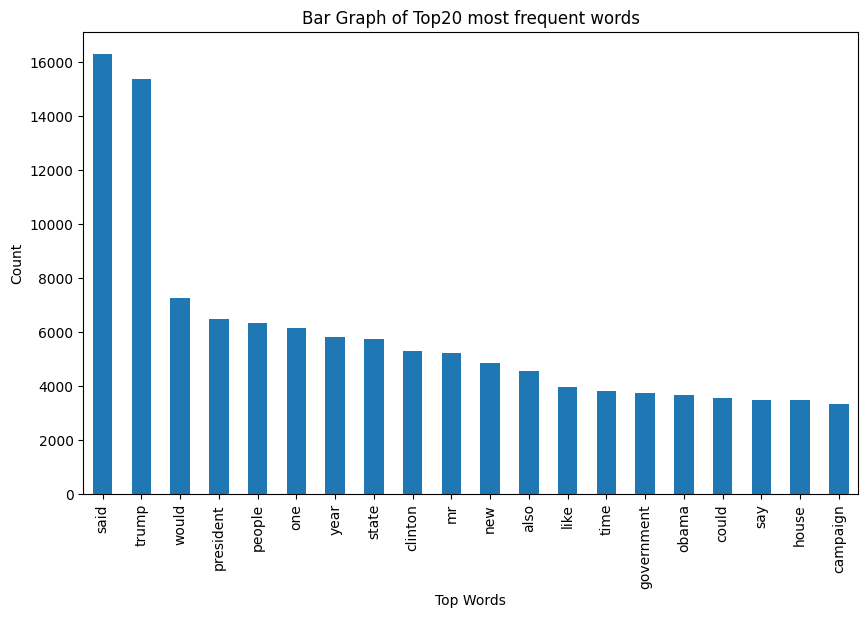

In [28]:
#BarGraph of top 20 most frequent words:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
  vec = CountVectorizer().fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq = [(word, sum_words[0,idx])
              for word, idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq, key=lambda x:x[1],reverse=True)
  return words_freq[:n]

common_words = get_top_n_words(news1['preprocessed_text'],20)
df1 = pd.DataFrame(common_words, columns=['Review','count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10,6),
    xlabel='Top Words',
    ylabel='Count',
    title='Bar Graph of Top20 most frequent words'
)

**Most common words in Real and fake articles**

In [29]:
from collections import Counter
fake_words = Counter(" ".join(news1[news1['label']==1]['preprocessed_text']).split()).most_common(20)
real_words = Counter(" ".join(news1[news1['label']==0]['preprocessed_text']).split()).most_common(20)
print('Top 20 words in fake news articles:', fake_words)
print('Top 20 words in real news articles:', real_words)

Top 20 words in fake news articles: [(',', 61939), ('.', 43311), (':', 7170), ('’', 7101), ('Trump', 6750), (')', 4758), ('(', 4716), ('“', 4360), ('”', 4267), ('?', 3350), ('said', 3323), ('Clinton', 3192), ('people', 2861), ('would', 2788), ('one', 2515), ('@', 2198), ('Hillary', 2194), ('like', 2023), ('!', 2013), ('Obama', 1923)]
Top 20 words in real news articles: [(',', 78304), ('.', 59847), ('’', 18056), ('“', 14020), ('”', 13985), ('said', 12779), ('Trump', 8017), ('Mr.', 4745), ('would', 4407), (')', 3980), ('(', 3955), ('year', 3151), ('—', 3071), ('people', 2964), ('U.S.', 2887), ('one', 2591), ('also', 2537), ('state', 2473), (':', 2435), ('-', 2264)]


**Distribution of text length**

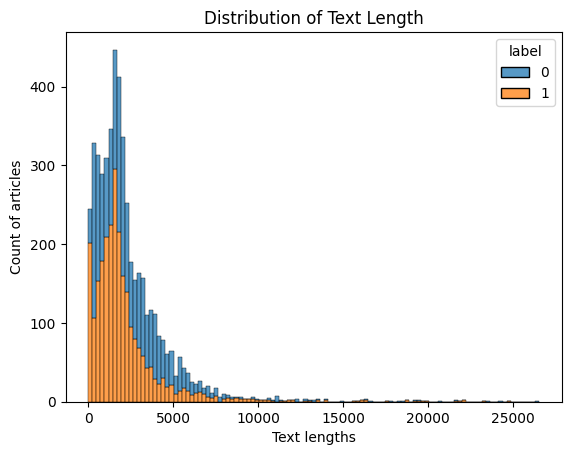

In [30]:
news1['text_length'] = news1['preprocessed_text'].apply(len)

#Visualize the distribution of text length:
sns.histplot(data=news1, x= "text_length", hue='label', multiple='stack')
plt.title("Distribution of Text Length")
plt.xlabel('Text lengths')
plt.ylabel('Count of articles') #count of articles falling within this range of text length
plt.show()

**Visualizing the relationship of text length and label**

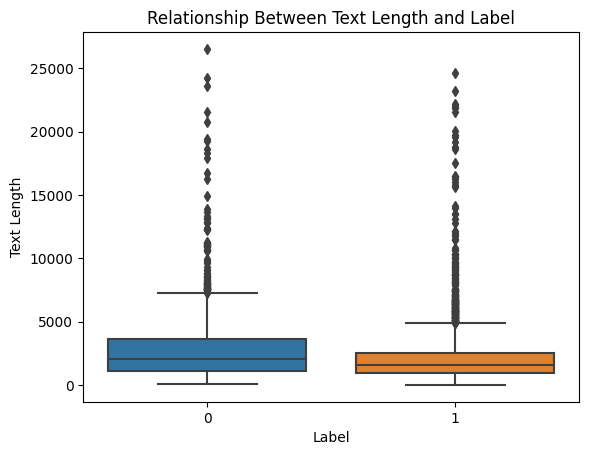

In [31]:
sns.boxplot(x='label', y='text_length', data=news1)
plt.title("Relationship Between Text Length and Label")
plt.xlabel('Label')
plt.ylabel('Text Length')
plt.show()

**Word Count distribution**

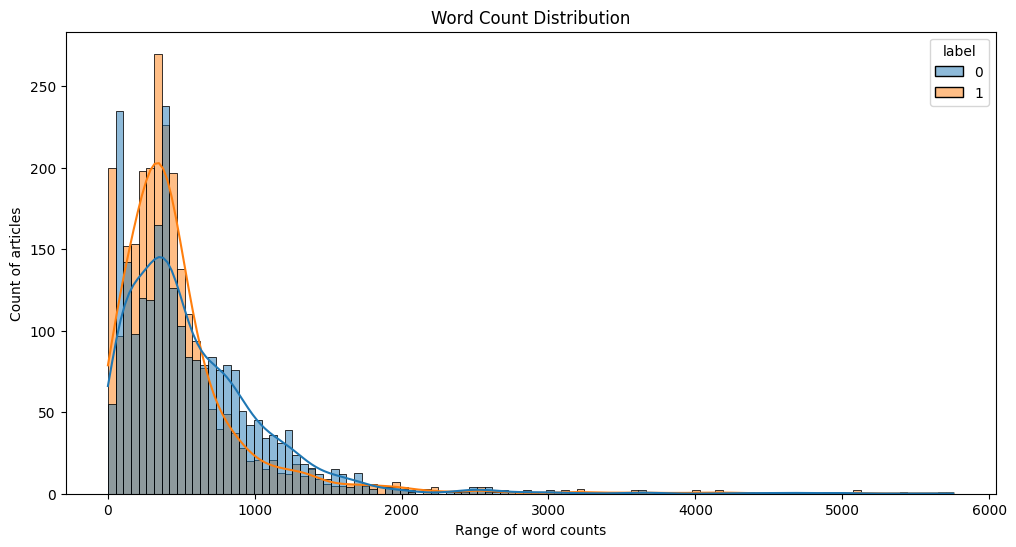

In [32]:
news1['word_count'] = news1['text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(12,6))
sns.histplot(data=news1, x='word_count', hue='label',kde=True)
plt.title('Word Count Distribution')
plt.xlabel('Range of word counts')
plt.ylabel('Count of articles') #number of articles falling in that range of word counts
plt.show()

**Character count distribution**

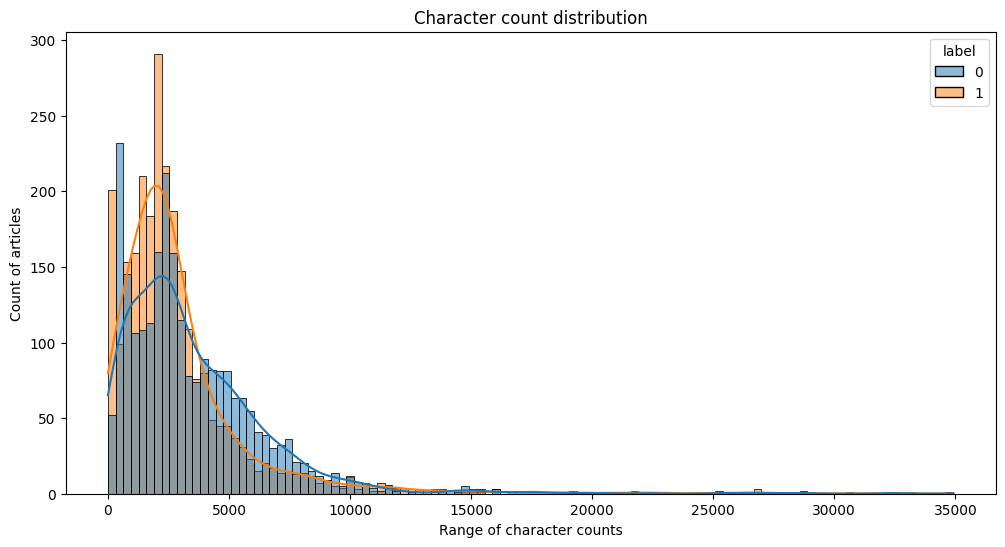

In [33]:
news1['char_count'] = news1['text'].apply(lambda x: len(str(x)))
plt.figure(figsize=(12,6))
sns.histplot(data=news1, x='char_count', hue='label', kde=True)
plt.title('Character count distribution')
plt.xlabel('Range of character counts')
plt.ylabel('Count of articles')
plt.show()

**Stop words count distribution**

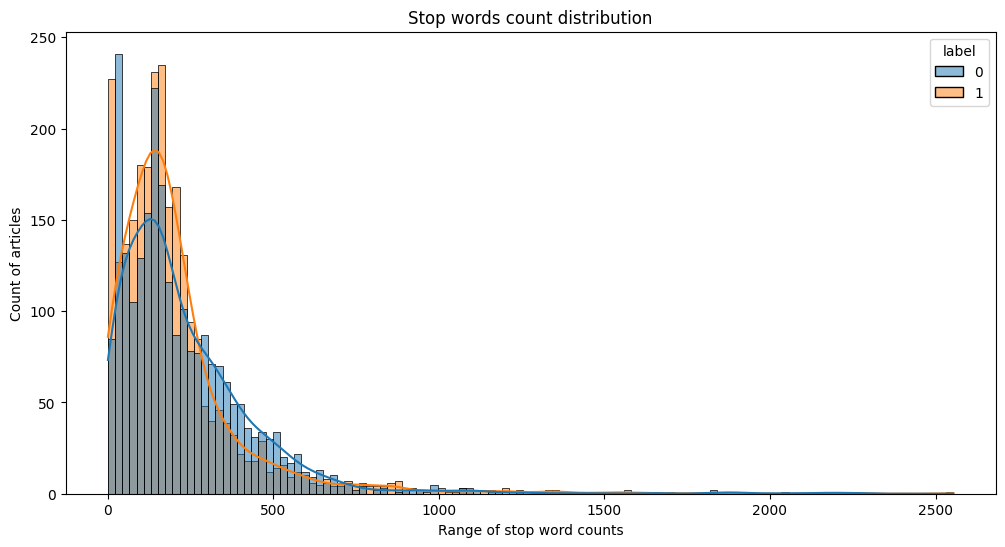

In [34]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
news1['stopwords_count'] = news1['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))
plt.figure(figsize=(12,6))
sns.histplot(data=news1, x ='stopwords_count', hue='label', kde=True)
plt.title('Stop words count distribution')
plt.xlabel('Range of stop word counts')
plt.ylabel('Count of articles')
plt.show()

# GloVe embeddings

- Global Vectors for Word Representation
- It is an unsupervised learning algorithm used to create vector representations of words in NLP.
- Based on co-occurence matrix of words in corpus that captures the number of times each word appears in context of other words.

In [106]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2023-04-25 04:09:36--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-04-25 04:09:37--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-04-25 04:09:37--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

gl

In [64]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [107]:
#Generating Word Embedding and storing in dictionary embeddings_index
embeddings_index = {}
with open('glove.6B.50d.txt') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
  
# Generating embeddings from embedding vector for each word.
embeddings_matrix = np.zeros((vocab_size1+1, embedding_dim))
for word, i in word_index1.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector

**Finding similar words to a particular word**

In [108]:
from scipy import spatial

def find_similar_word(emmbedes):
  nearest = sorted(embeddings_index.keys(), key=lambda word: spatial.distance.euclidean(embeddings_index[word], emmbedes))
  return nearest

In [109]:
find_similar_word(embeddings_index['trump'])[:5]

['trump', 'hilton', 'hyatt', 'paragon', 'camelot']

In [110]:
find_similar_word(embeddings_index['government'])[:5]

['government', 'administration', 'governments', 'demanded', 'promised']

In [111]:
find_similar_word(embeddings_index['president'])[:5]

['president', 'vice', 'met', 'secretary', 'presidency']

Combining words to find new word

In [112]:
find_similar_word(embeddings_index['president'] + embeddings_index['trump'] + embeddings_index['said'])[0:10]

['president',
 'said',
 'chairman',
 'told',
 'vice',
 'chief',
 'executive',
 'secretary',
 'asked',
 "'s"]

**Using t-SNE to perform dimensionality reduction and visualize the words using glove.**

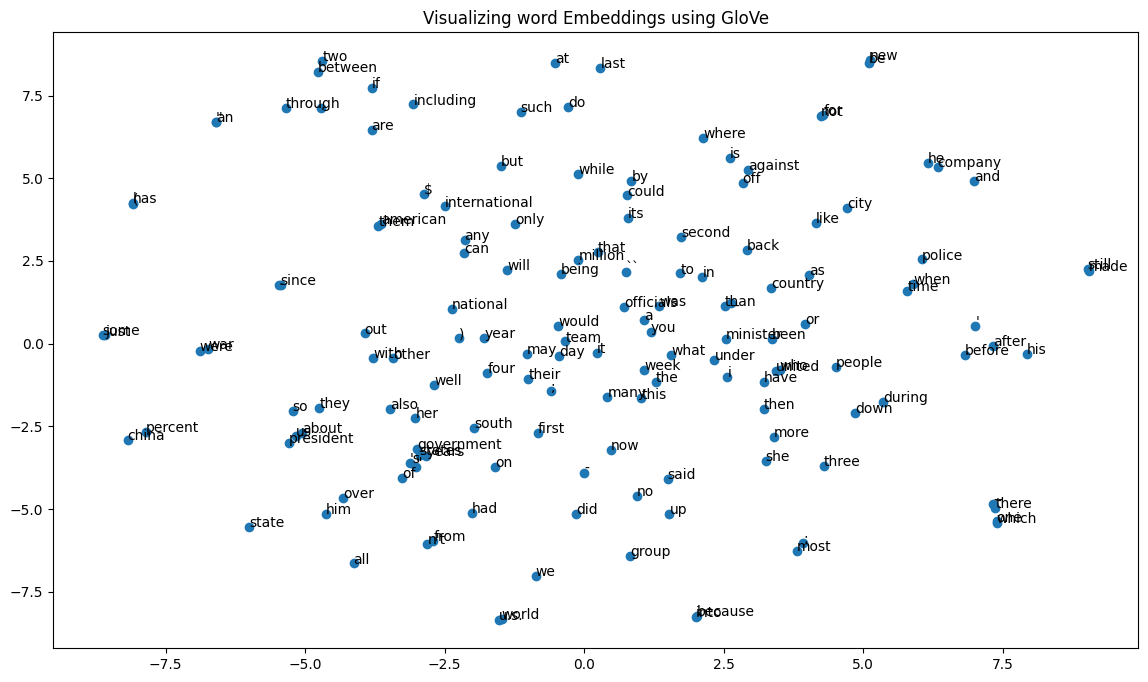

In [114]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

distri = TSNE(n_components=2)
words = list(embeddings_index.keys())
vectors = np.array([embeddings_index[word] for word in words])
y = distri.fit_transform(vectors[700:850])
plt.figure(figsize=(14,8))
plt.scatter(y[:,0], y[:,1])
for label,x,y in zip(words, y[:, 0], y[:,1]):
  plt.annotate(label, xy=(x,y), xytext=(0,0), textcoords='offset points')
plt.title("Visualizing word Embeddings using GloVe")
plt.show()

This plot shows the semantic relationship between words.
This 2D plot reveals clusters of words that are semantically related.

This helps to understand the underlying structure of corpus of text.

# Classifying news as real or fake

The problem of classifying real and fake news is a classification problem. So we have applied different classification algorithms to find which one performs the best. For evalution, we have used accuracy, precision, recall and f1-score as the evaluation metrics.

## Splitting the dataset

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

X_train, X_test, Y_train, Y_test = train_test_split(news1['preprocessed_text'],news1['label'], test_size = 0.3)

## TF-IDF Vectorization


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

**Initializing the dictionaries to compare the models**

In [39]:
acc_dict = {}
precision_dict = {}
recall_dict = {}
f1_dict = {}

**Defining a generalized function to train and evaluate any machine learning model**

In [49]:
from sklearn import metrics

#function to train any model and evaluate
def train_evaluate_model(model, key, x_train, x_test):
  print("Training model:", key)
  model.fit(x_train, Y_train)

  y_pred = model.predict(x_test)
  
  #Confusion matrix
  cm = metrics.confusion_matrix(Y_test, y_pred)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False,True])
  cm_display.plot()
  plt.show()
  
  train_acc = accuracy_score(Y_train, model.predict(x_train))
  test_acc = accuracy_score(Y_test, y_pred)

  print()
  print("Training accuracy: ", train_acc)
  print("Test accuracy: ", test_acc)

  #Other evaluation metrics
  precision = metrics.precision_score(Y_test, y_pred)
  recall = metrics.recall_score(Y_test, y_pred)
  f1 = metrics.f1_score(Y_test, y_pred)

  #Save values to dictionary
  acc_dict[key] = test_acc
  precision_dict[key] = precision
  recall_dict[key] = recall
  f1_dict[key] = f1

# Machine Learning Models

## 1. Naive Bayes

Training model: GaussianNB


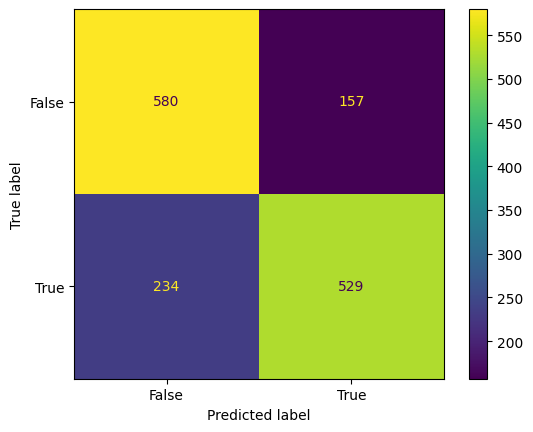


Training accuracy:  0.9828571428571429
Test accuracy:  0.7393333333333333


In [50]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
train_evaluate_model(nb_classifier, "GaussianNB", X_train.toarray(), X_test.toarray())

## 2. Logistic Regression

Training model: LogisticRegression


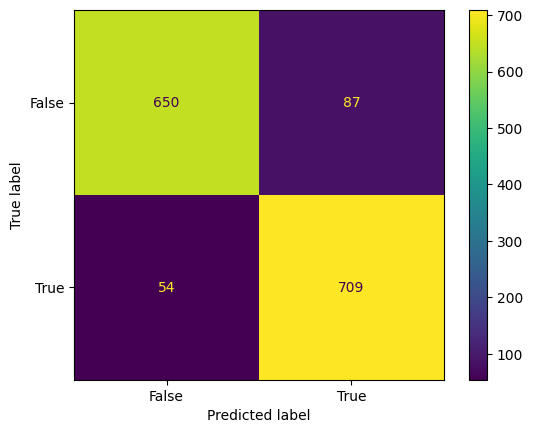


Training accuracy:  0.9517142857142857
Test accuracy:  0.906


In [52]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
train_evaluate_model(model, "LogisticRegression", X_train, X_test)

## 3. Decision Tree

Training model: DecisionTree


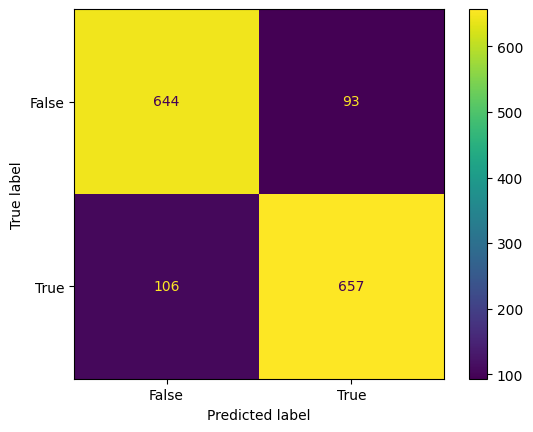


Training accuracy:  1.0
Test accuracy:  0.8673333333333333


In [53]:
from sklearn.tree import DecisionTreeClassifier
  
model = DecisionTreeClassifier()
train_evaluate_model(model, "DecisionTree", X_train, X_test)

## 4. Random Forest

Training model: RandomForest


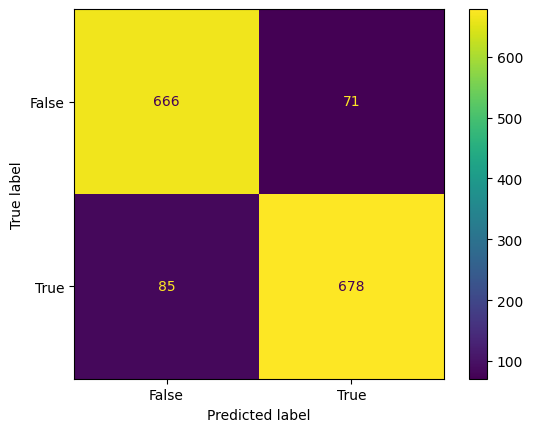


Training accuracy:  1.0
Test accuracy:  0.896


In [54]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators = 100, random_state=0)
train_evaluate_model(rf_clf, "RandomForest", X_train, X_test)

## 5. KNN 

Training model: KNN


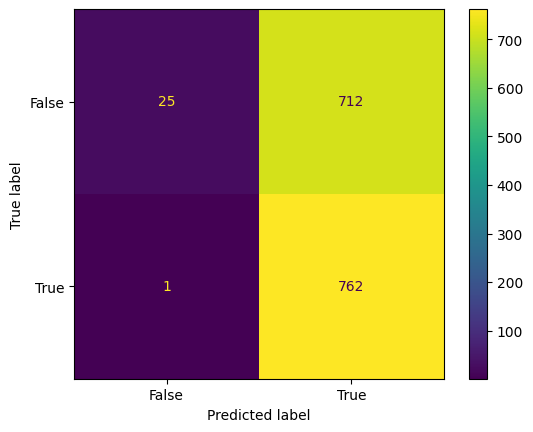


Training accuracy:  0.5482857142857143
Test accuracy:  0.5246666666666666


In [55]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
train_evaluate_model(knn, "KNN", X_train, X_test)

## 6. ANN

In [56]:
from keras.models import Sequential
from keras.layers import Dense

In [57]:
#Build the Model
model = Sequential()
model.add(Dense(10, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [58]:
#Compile the Model:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [59]:
history = model.fit(X_train,Y_train, epochs=100, batch_size=32, validation_data=(X_test,Y_test))

Train on 3500 samples, validate on 1500 samples
Epoch 1/100
3488/3500 [============================>.] - ETA: 0s - loss: 0.6123 - accuracy: 0.7973

/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


3500/3500 [==============================] - 3s 814us/sample - loss: 0.6122 - accuracy: 0.7966 - val_loss: 0.4877 - val_accuracy: 0.8707
Epoch 2/100
3500/3500 [==============================] - 3s 829us/sample - loss: 0.3276 - accuracy: 0.9474 - val_loss: 0.2851 - val_accuracy: 0.9167
Epoch 3/100
3500/3500 [==============================] - 3s 772us/sample - loss: 0.1282 - accuracy: 0.9877 - val_loss: 0.2119 - val_accuracy: 0.9300
Epoch 4/100
3500/3500 [==============================] - 2s 609us/sample - loss: 0.0517 - accuracy: 0.9977 - val_loss: 0.1839 - val_accuracy: 0.9313
Epoch 5/100
3500/3500 [==============================] - 2s 602us/sample - loss: 0.0243 - accuracy: 0.9994 - val_loss: 0.1761 - val_accuracy: 0.9333
Epoch 6/100
3500/3500 [==============================] - 2s 662us/sample - loss: 0.0132 - accuracy: 0.9997 - val_loss: 0.1684 - val_accuracy: 0.9327
Epoch 7/100
3500/3500 [==============================] - 2s 655us/sample - loss: 0.0081 - accuracy: 0.9997 - val_loss:

In [60]:
loss, acc = model.evaluate(X_test, Y_test)

In [61]:
acc

0.9293333

In [62]:
acc_dict["ANN"] = acc

In [71]:
acc_dict

{'GaussianNB': 0.7393333333333333,
 'LogisticRegression': 0.906,
 'DecisionTree': 0.8673333333333333,
 'RandomForest': 0.896,
 'KNN': 0.5246666666666666,
 'ANN': 0.9293333}

In [73]:
y_pred = model.predict(X_test)
y_pred = (y_pred>=0.5).astype(int)

In [76]:
precision = metrics.precision_score(Y_test, y_pred)
recall = metrics.recall_score(Y_test, y_pred)
f1 = metrics.f1_score(Y_test, y_pred)

precision_dict["ANN"] = precision
recall_dict["ANN"] = recall
f1_dict["ANN"] = f1

## 7. Gradient Boosting

Training model: GradientBoosting


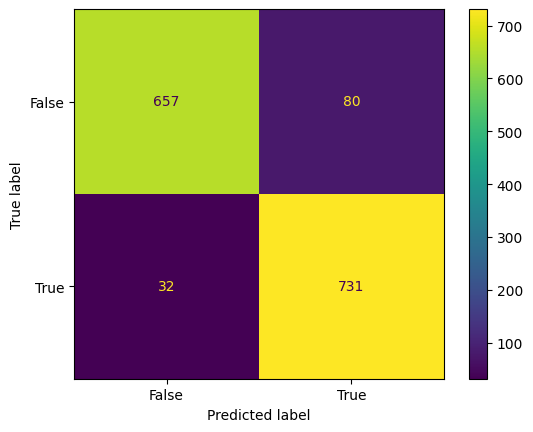


Training accuracy:  0.9688571428571429
Test accuracy:  0.9253333333333333


In [78]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
train_evaluate_model(gb_model, "GradientBoosting", X_train, X_test)

## 8. AdaBoost Classifier

Training model: AdaBoost


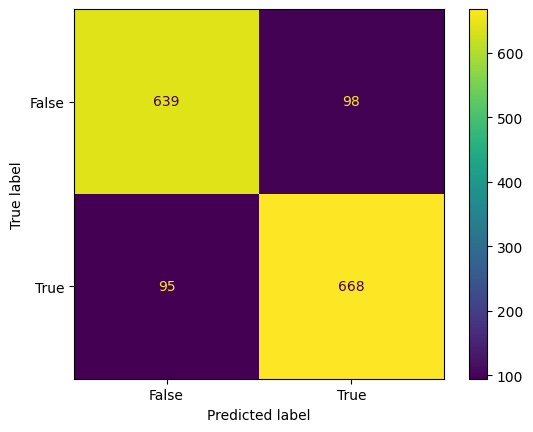


Training accuracy:  1.0
Test accuracy:  0.8713333333333333


In [79]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
train_evaluate_model(ada_model, "AdaBoost", X_train, X_test)

# Comparision between all models

In [84]:
def plot_graph(dict, metric):

  labels = list(dict.keys())
  values = list(dict.values())

  plt.bar(labels, values)
  plt.title(metric +" values for different models")
  plt.xlabel("Models")
  plt.ylabel(metric)
  plt.xticks(rotation=90)
  plt.show()

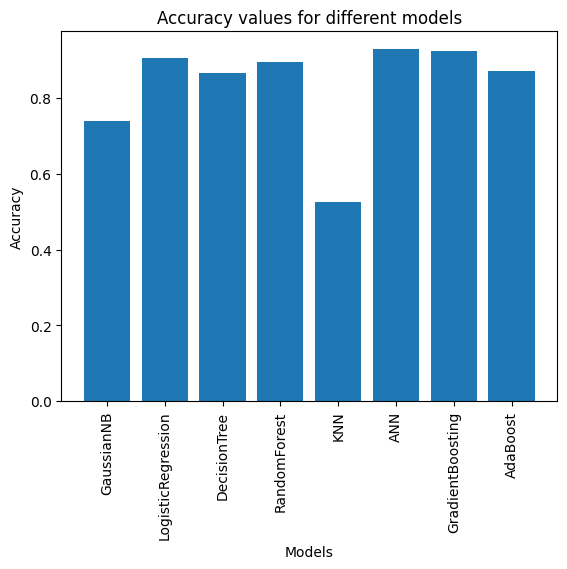

In [85]:
plot_graph(acc_dict, "Accuracy")

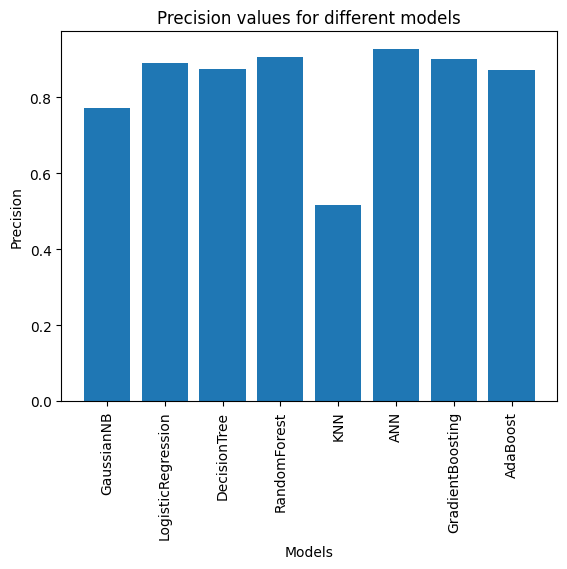

In [86]:
plot_graph(precision_dict, "Precision")

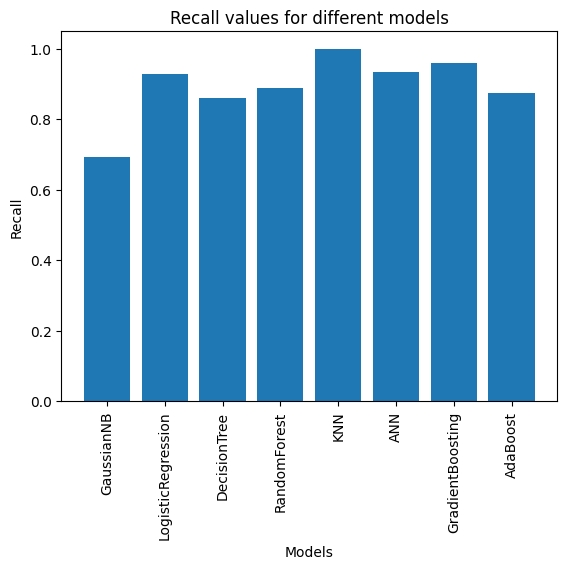

In [87]:
plot_graph(recall_dict, "Recall")

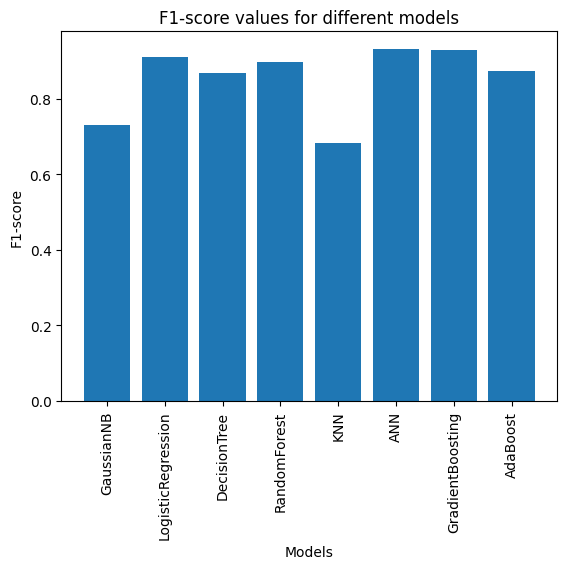

In [88]:
plot_graph(f1_dict, "F1-score")

# References

- https://analyticsindiamag.com/hands-on-guide-to-word-embeddings-using-glove/
